In [1]:
import pandas as pd                 # Data tables
import os                           # Returns current directory, create files
import numpy as np                  # Arrays
import matplotlib.pyplot as plt	    # Graphs

from math import sqrt, atan, log, exp, sin, cos, tan

from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.optimize import *

from Heat_loads_solar_window_CLF_230318 import *

pd.options.display.max_columns = 999

# DATA

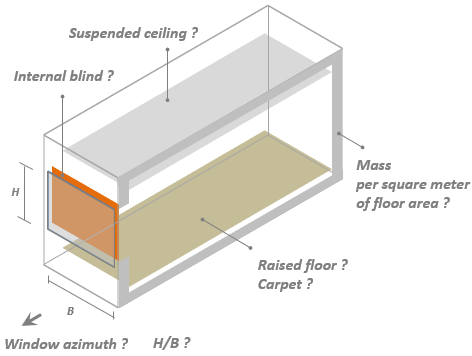

In [2]:
# Internal blind : 1 = True, 0 = False
internal_blind    = 0

# Wall thermal mass accessibility from internal side: 1 = True, 0 = False
suspended_ceiling = 0
raised_floor      = 0
carpet            = 0

# Average Specific mass per square meter of internal floor area, in [kg/m2] 
M_A               = 387.32

# Azimuth of the window, in deg  (South = 0, West = 90, North = 180, East = -90)
azimuth_wd_deg    = 0

# Window proportional factor: ratio Height/Breadth
H_B               = 1

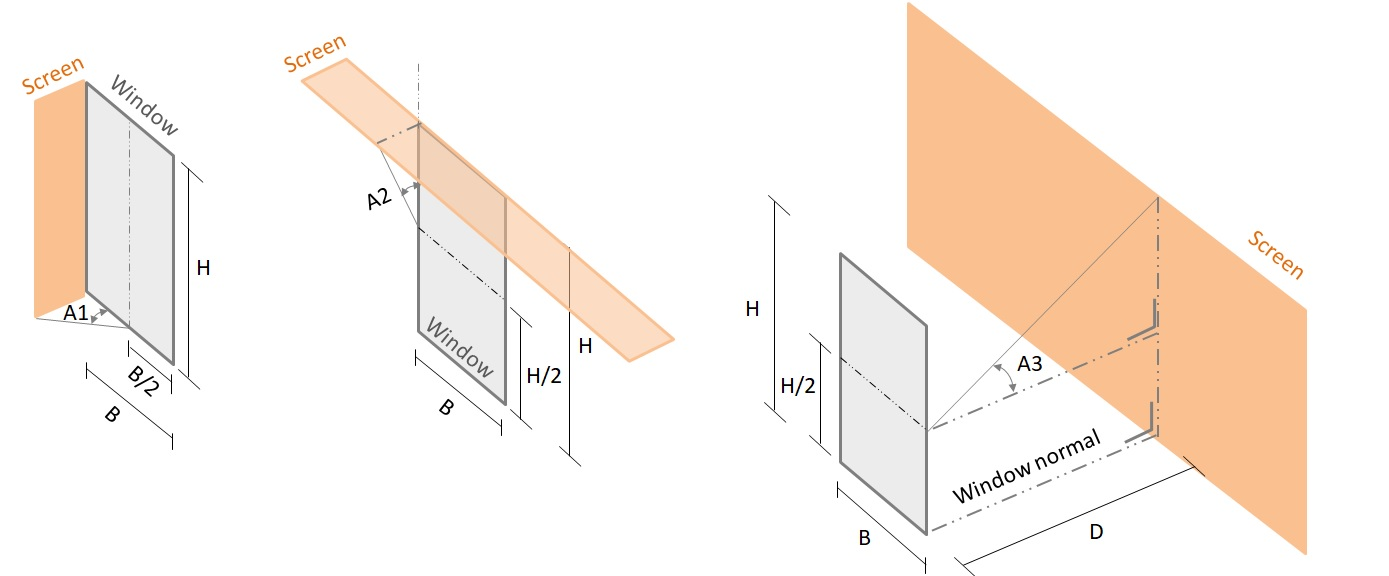

In [3]:
# Lateral screens on both sides: horizontal angle measured from the center of the window, comprised between 0 and 90, in deg
A1 = 8

# Top screen: vertical angle measured from the center of the window, comprised between 0 and 90, in deg
A2 = 8

# Frontal screen facing the window: vertical angle measured from the center of the window, comprised between -90 and 90, in deg 
A3 = 0

# Screen distance from the window divided by the window height, 0 means no screen
D_H = 0

In [10]:
# Month comprised between 1 and 12
month = 7

# Daily Plant operating hours comprised between 0 and 24 h (0 to 24 h for continuous operating system)
hour_start_plant  = 0
hour_stop_plant   = 24

In [11]:
dfl, dfp, dfc, I_t_wd_day_max = CLF(internal_blind, suspended_ceiling, raised_floor, carpet, \
          M_A, azimuth_wd_deg, H_B, A1, A2, A3, D_H, month, hour_start_plant, hour_stop_plant, method="LSODA")

# Default : method="LSODA"
# Other   :  method="Radau", method="RK45" 

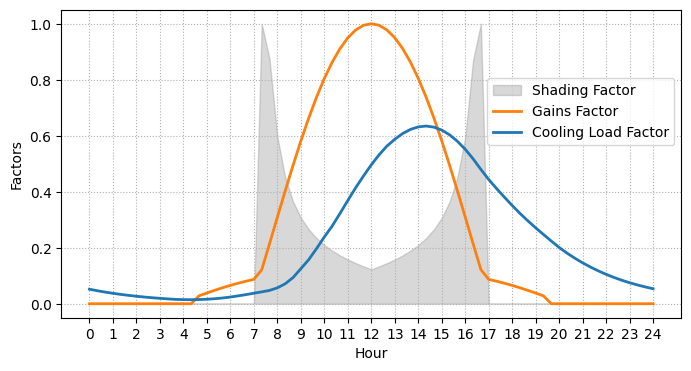

In [12]:
%matplotlib inline
plt.figure(figsize = (8,4))
plt.xticks(np.arange(0, dfl['hour_per'].values[-1] + 1 , 1))
plt.fill_between(dfl['hour_per'], 0*dfl['SF'], dfl['SF'], color= 'grey', alpha=.30, label="Shading Factor")
plt.plot(dfl['hour_per'], dfl['GF'], color= 'C1', linewidth=2.0, label="Gains Factor")
plt.plot(dfl['hour_per'], dfl['CLF'], color= 'C0', linewidth=2.0, label="Cooling Load Factor")
plt.xlabel('Hour')
plt.ylabel('Factors')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.grid(linestyle= 'dotted')

In [13]:
dfp.T

hour_per,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
CLF,0.05,0.04,0.03,0.02,0.01,0.02,0.02,0.04,0.06,0.12,0.24,0.37,0.5,0.59,0.63,0.62,0.55,0.44,0.35,0.27,0.2,0.15,0.11,0.07,0.05


In [14]:
print("Maximum solar intensity on window for the considered month         :", round(I_t_wd_day_max,1), "(W/m2)")

Maximum solar intensity on window for the considered month         : 506.8 (W/m2)


In [15]:
dfc.T.to_clipboard(index=False)